# **Import all the needed library**

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Machine learning models and utilities
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Sparse matrix operations
from scipy.sparse import hstack, csr_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sb

 # **Import the data from csv file**

In [ ]:
#Read csv file
book_data_balanced = pd.read_csv("book_data_balanced.csv")
book_data_balanced.info()
book_data_balanced.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10186 entries, 0 to 10185
Data columns (total 41 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   asin                                        10186 non-null  object 
 1   title                                       10186 non-null  object 
 2   author                                      10186 non-null  object 
 3   stars                                       10186 non-null  float64
 4   price                                       10186 non-null  float64
 5   isKindleUnlimited                           10186 non-null  bool   
 6   category_id                                 10186 non-null  int64  
 7   isBestSeller                                10186 non-null  bool   
 8   isEditorsPick                               10186 non-null  bool   
 9   isGoodReadsChoice                           10186 non-null  bool   
 10  top_author

,asin,title,author,stars,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,...,category_name_Politics & Social Sciences,category_name_Reference,category_name_Religion & Spirituality,category_name_Romance,category_name_Science & Math,category_name_Science Fiction & Fantasy,category_name_Self-Help,category_name_Sports & Outdoors,category_name_Teen & Young Adult,category_name_Travel
0,B0CFWMH8RB,Reframe Your Brain: The User Interface for Hap...,Scott Adams,4.8,9.99,False,27,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,B0B9BCP7LP,The Peking Express: The Bandits Who Stole a Tr...,James M Zimmerman,4.5,3.99,False,9,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,B0CBWJKK4W,Amish Harvest Time: Amish Romance (The Amish B...,Samantha Price,4.7,4.99,True,5,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,B0B6GNP833,The Bones at Point No Point (A Thomas Austin C...,D.D. Black,4.4,4.99,True,21,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,B09MDRQB5P,Quantum Physics For Beginners: The Simple Guid...,Jeremy Wooster,4.3,9.99,True,11,True,False,False,...,False,False,False,False,False,False,False,False,False,False


---

# **Changing number of trees**
In this model, we will change the number of trees from 100 to **1000**.

# **Model 5: Random Forest with Max depth of 4 and 1000 trees**

## **I. Data Preparation:**
- **Response and Predictors:**
   - Predictors:
   > `Title`\
   > `Author`\
   > `Genre`\
   > `Star rating`\
   > `Price`
   - Response: `isBestSeller`.

- **Train-Test Split**:
   - Dataset split: **80% training**, **20% testing**, ensuring robust evaluation.

- **TF-IDF Vectorization**:
   - Text data (`title`) is transformed into numeric features using the **TF-IDF** method.
   - Sparse matrices are created for numeric features for efficiency.

## **II. Model Training:**
- **Feature Combination**:
   - Features are combined into a single matrix for training and testing.

- **Random Forest**:
   - Use **Random Forest** to train predictors to give the response.


This workflow ensures efficient data handling, feature engineering, and meaningful visualization for interpreting the classification model.

In [ ]:
# Extract response and predictor variables
X_text = book_data_balanced['title']
X_other = book_data_balanced.drop(columns=['asin', 'title', 'author', 'isKindleUnlimited', 'category_id',
                                           'isBestSeller', 'isEditorsPick', 'isGoodReadsChoice'])
y = book_data_balanced['isBestSeller']

# Split the dataset into training and testing sets
X_text_train, X_text_test, X_other_train, X_other_test, y_train, y_test = train_test_split(X_text, X_other, y, test_size=0.2)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_text_train_tfidf = vectorizer.fit_transform(X_text_train)
X_text_test_tfidf = vectorizer.transform(X_text_test)

X_other_train = X_other_train.astype(int)
X_other_test = X_other_test.astype(int)

# Convert numeric features to sparse matrices
X_other_train_sparse = csr_matrix(X_other_train.values)
X_other_test_sparse = csr_matrix(X_other_test.values)

# Combine text and numeric features
X_train_combined = hstack([X_text_train_tfidf, X_other_train_sparse])
X_test_combined = hstack([X_text_test_tfidf, X_other_test_sparse])

In [ ]:
# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,
                                 max_depth = 4)

# Fit Random Forest on Train Data
rforest.fit(X_train_combined, y_train.ravel())

<ipython-input-28-66c66b2b7248>:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  rforest.fit(X_train_combined, y_train.ravel())


RandomForestClassifier(max_depth=4, n_estimators=1000)

# **Checking accuracy**

After training the Random Forest (max depth = 4, number of trees = 1000) model, we will check the accuracy for training dataset and testing dataset

##  **I. Train Data Analysis**

We will use confusion matrix to check:
- Accuracy
- True Positive Rate
- True Negative Rate
- False Positive Rate
- False Negative Rate

Train Data
Accuracy  :	 0.7519636720667648

TPR Train :	 0.7885602542165729
TNR Train :	 0.7150603894503328

FPR Train :	 0.28493961054966727
FNR Train :	 0.21143974578342703


<Axes: >

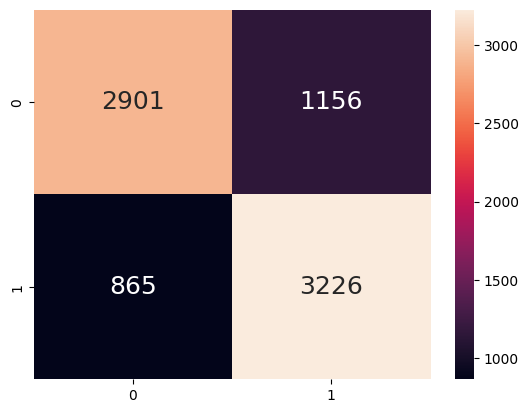

In [ ]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train_combined)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train_combined, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

### **Confusion Matrix:**
- **True Negatives (TN)**: 2901 books were correctly classified as non-bestsellers.
- **True Positives (TP)**: 3226 books were correctly identified as bestsellers.
- **False Negatives (FN)**: 865 bestsellers were misclassified as non-bestsellers.
- **False Positives (FP)**: 1156 non-bestsellers were misclassified as bestsellers.

### **Key Metrics:**
1. **Accuracy**:
   - The model achieved an accuracy of **75.20%**, reflecting quite high overall correctness in predictions.
2. **True Positive Rate (TPR)**:
   - **78.86%**, indicating that model 5 have improve in predicting bestseller books comparing to model 4.
3. **True Negative Rate (TNR)**:
   - **71.51%**, indicating that model 5 have improve in predicting non bestseller books comparing to model 4.
4. **False Positive Rate (FPR)**:
   - **28.49%**, highlighting acceptable misclassification of non-bestsellers.
5. **False Negative Rate (FNR)**:
   - **21.14%**, highlighting acceptable misclassification of bestsellers.

## **II. Test Data Analysis**

We will use confusion matrix to check:
- Accuracy
- True Positive Rate
- True Negative Rate
- False Positive Rate
- False Negative Rate

Test Data
Accuracy  :	 0.711972522080471

TPR Test :	 0.7754491017964071
TNR Test :	 0.6505791505791506

FPR Test :	 0.34942084942084944
FNR Test :	 0.2245508982035928


<Axes: >

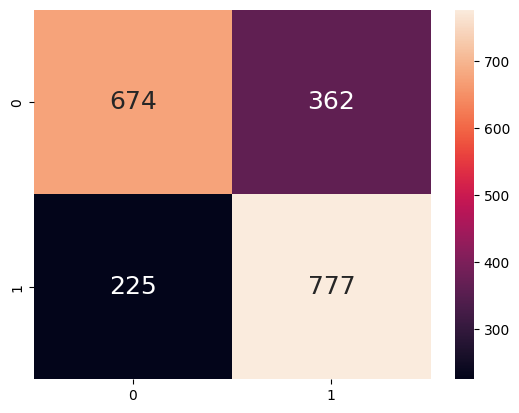

In [ ]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test_combined)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test_combined, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

### **Confusion Matrix:**
- **True Negatives (TN)**: 674 books were correctly classified as non-bestsellers.
- **True Positives (TP)**: 777 books were correctly identified as bestsellers.
- **False Negatives (FN)**: 225 bestsellers were misclassified as non-bestsellers.
- **False Positives (FP)**: 362 non-bestsellers were misclassified as bestsellers.

### **Key Metrics:**
1. **Accuracy**:
   - The model achieved an accuracy of **71.20%**, reflecting quite high overall correctness in predictions.
2. **True Positive Rate (TPR)**:
   - **77.54%**, indicating that model 5 have improve in predicting bestseller books comparing to model 4.
3. **True Negative Rate (TNR)**:
   - **65.06%**, indicating that model 5 have improve in predicting bestseller books comparing to model 4.
4. **False Positive Rate (FPR)**:
   - **34.94%**, highlighting acceptable misclassification of non-bestsellers.
5. **False Negative Rate (FNR)**:
   - **22.46%**, highlighting acceptable misclassification of bestsellers.

# **Conclusion:**

When we increase the number of trees in Random Forest to **1000**, the performance of the model 5 increase in both predicting bestseller and non bestseller books comparing to model 4.